In [ ]:
# This notebook does some quick plots to check your input data and your FWI for plausibility

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from cartopy import crs as ccrs
from cartopy import feature as cfeature
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)

In [27]:
workdir = "/work/bb1153/m300363/fireweather_data/California/"

YYYY="2020-2049"
# YYYY = "1990-2019"

# exp="IFS_9-FESOM_5-production"
# exp="IFS_9-FESOM_5-production-hist"
exp="ICON_ngc4008"

infile_input= workdir + "inputvars_" + exp + "_California_025deg_" + str(YYYY) + ".nc"
infile_fwi = workdir + "fwi_" + exp + "_California_025deg_" + str(YYYY) + ".nc"

ds_input = xr.load_dataset(infile_input)
ds_fwi = xr.load_dataset(infile_fwi)

In [1]:
# uncomment to check variables in ds_fwi
# 
# ds_fwi

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)


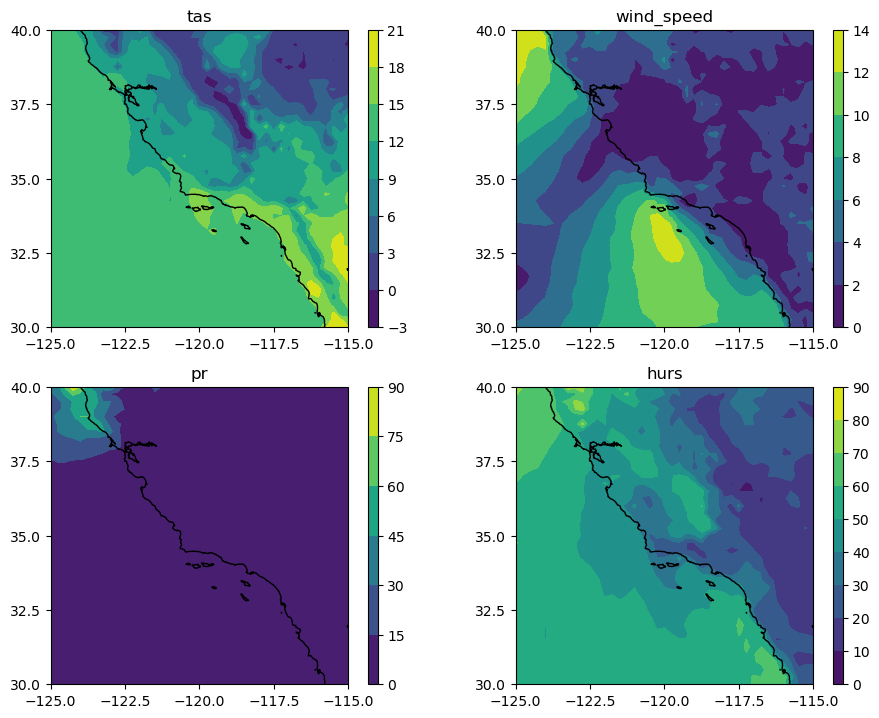

In [81]:
# plot maps of input variables for a single day (choose by setting ts)

ts=10        # pick timestep of your choice
n_xticks=5   # select number of latitude ticks
n_yticks=5   # select number of longitude ticks

proj=ccrs.PlateCarree()

varlist=["tas","wind_speed","pr","hurs"]

flon=ds_input.lon[0]
llon=ds_input.lon[len(ds_input.lon)-1]
lonrange=llon-flon
lontickstep=(llon-flon)/(n_xticks-1)

flat=ds_input.lat[0]
llat=ds_input.lat[len(ds_input.lat)-1]
latrange=llat-flat
lattickstep=(llat-flat)/(n_yticks-1)

xticks=np.arange(flon,llon+lontickstep,lontickstep)
yticks=np.arange(flat,llat+lattickstep,lattickstep)

fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': proj},
                        figsize=(11,8.5))

axs=axs.flatten()

for i, var in enumerate(varlist):
    data=ds_input[var][ts,:,:]
    contourplot = axs[i].contourf(ds_input.lon,ds_input.lat,data,add_colorbar=True)
    axs[i].set_xticks(xticks)
    axs[i].set_yticks(yticks)
    contourplot.xformatter = LongitudeFormatter()
    contourplot.yformatter = LatitudeFormatter()
    cbar = plt.colorbar(contourplot,orientation='vertical',pad=0.05,aspect=30,ax=axs[i])
    axs[i].coastlines()
    axs[i].set_title(var)

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)


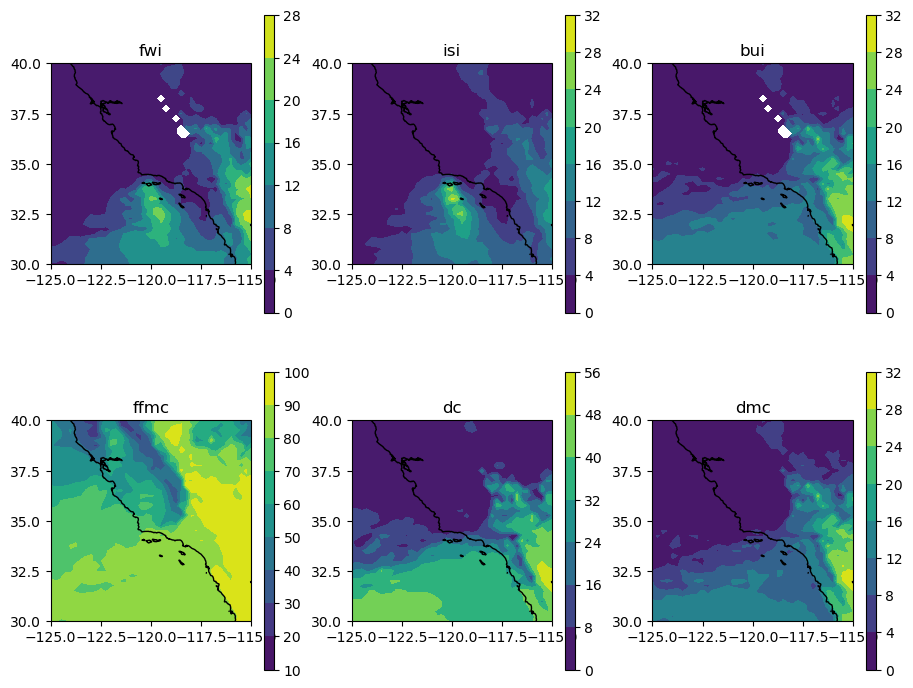

In [85]:
# plot maps of FWI and its components for a single day (choose by setting ts)

proj=ccrs.PlateCarree()

ts=10             # select timestep
n_xticks=5        # select number of latitude ticks
n_yticks=5        # select number of longitude ticks
limit_cbar=False  # set bounds for cbar. Put False for automatic cbar limits 
cbar_boundaries=np.arange(0, 100, 10)

varlist=["fwi","isi","bui","ffmc","dc","dmc"]

flon=ds_input.lon[0]
llon=ds_input.lon[len(ds_input.lon)-1]
lonrange=llon-flon
lontickstep=(llon-flon)/(n_xticks-1)

flat=ds_input.lat[0]
llat=ds_input.lat[len(ds_input.lat)-1]
latrange=llat-flat
lattickstep=(llat-flat)/(n_yticks-1)

xticks=np.arange(flon,llon+lontickstep,lontickstep)
yticks=np.arange(flat,llat+lattickstep,lattickstep)

fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': proj},
                        figsize=(11,8.5))

axs=axs.flatten()

for i, var in enumerate(varlist):
    data=ds_fwi[var][ts,:,:]
    #ax.axes(projection=proj)
    #ax.add_feature(cfeature.COASTLINE)
    if limit_cbar:
        contourplot = axs[i].contourf(ds_fwi.lon,ds_fwi.lat,data,cbar_boundaries,add_colorbar=True,extend="both")
    else:
        contourplot = axs[i].contourf(ds_fwi.lon,ds_fwi.lat,data,add_colorbar=True)   
    axs[i].set_xticks(xticks)
    axs[i].set_yticks(yticks)
    contourplot.xformatter = LongitudeFormatter()
    contourplot.yformatter = LatitudeFormatter()
    cbar = plt.colorbar(contourplot,orientation='vertical',pad=0.05,aspect=30,ax=axs[i])
    axs[i].coastlines()
    axs[i].set_title(var)

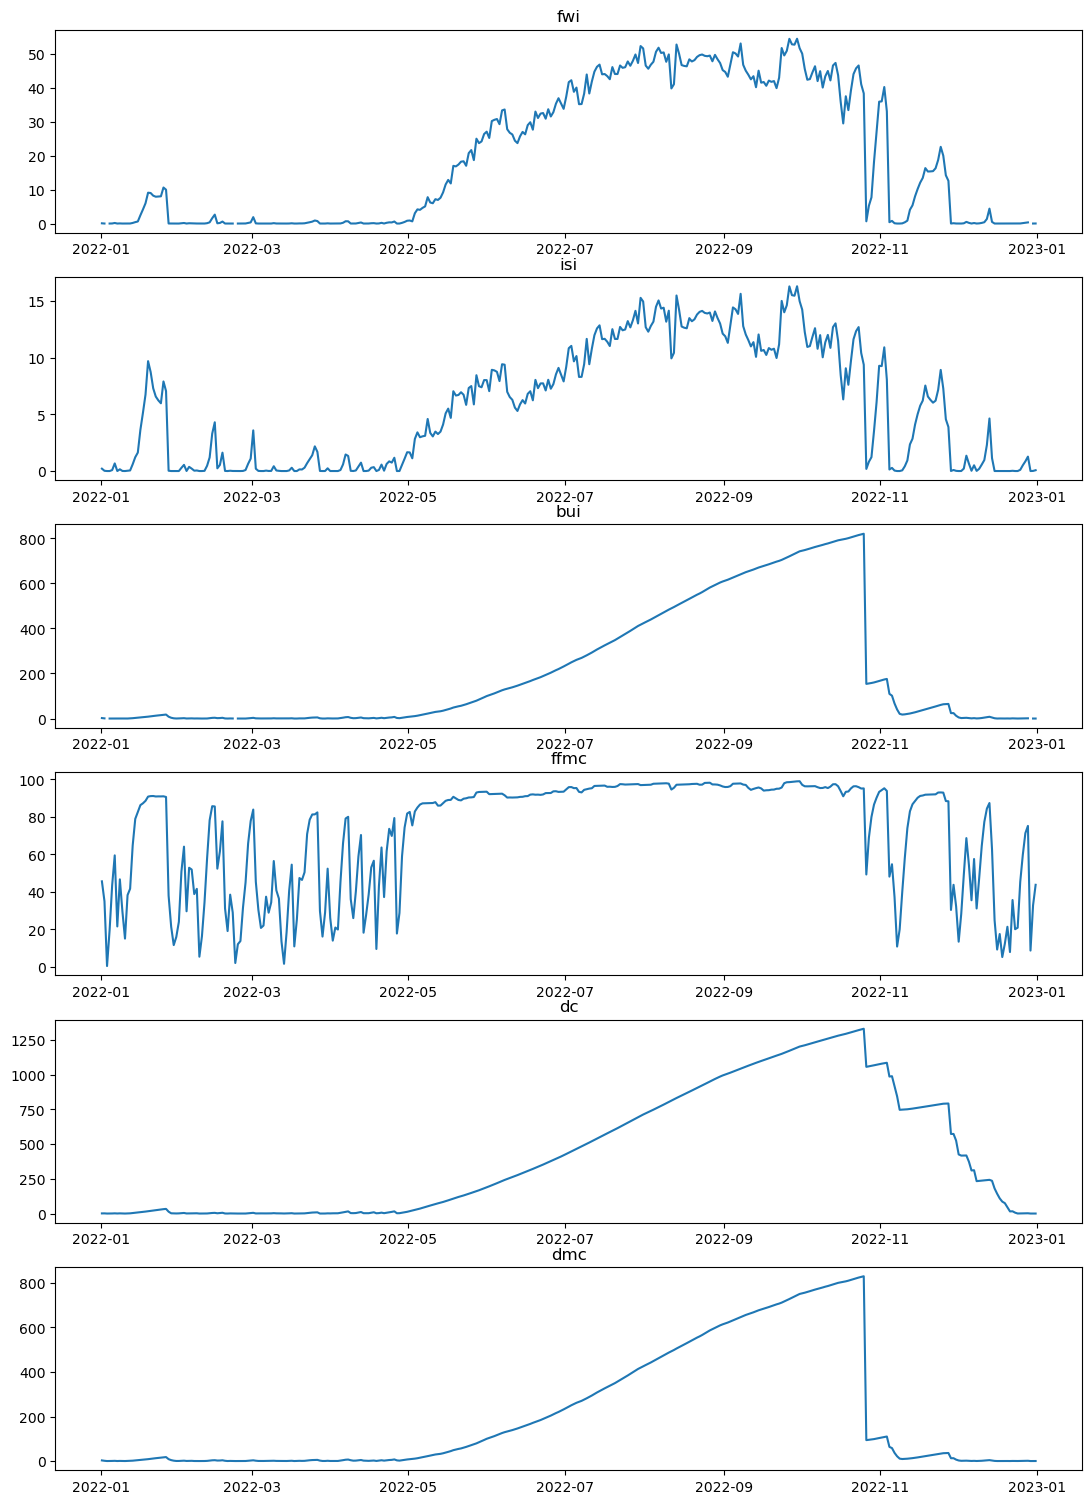

In [86]:
# plot a time series for a single point

lon_sel=-120
lat_sel=37.5

time_min="2020-01-01"
time_max="2022-12-31"

varlist=["fwi","isi","bui","ffmc","dc","dmc"]

fig, axs = plt.subplots(nrows=6,ncols=1,
                        figsize=(11,15))
fig.tight_layout()

axs=axs.flatten()

for i, var in enumerate(varlist):
    data=ds_fwi[var].sel(lon=lon_sel,lat=lat_sel,method="nearest").sel(time=slice(time_min,time_max))
    taxis=ds_fwi.time.sel(time=slice(time_min,time_max))
    plot = axs[i].plot(taxis,data)   
    axs[i].set_title(var)